# Supervised Learning - Building a Student Performace Prediction System


# Classification vs. Regression
The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

# Logistic Regression

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

In [129]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Question 1 - Exploring the Data (0.5 points)
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [102]:
std1=pd.read_csv("students-data.csv", delimiter=';')
std1.shape

(395, 33)

# Question 2 - drop missing values (0.5 points)
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*
*Use .dropna() function to drop the NAs*

#### Answer:

In [103]:
std1.index.name='number'

# Transform Data

## Question 3 (0.5 points)

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [104]:
std2=std1.select_dtypes(exclude='int64')
std2.shape

(395, 17)

# Question 4 - Drop variables with less variance (0.5 points)

*Find the variance of each numerical independent variable and drop whose variance is less than 1. Use .var function to check the variance*

In [105]:
std1.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [106]:
std1_new=std1.drop(['traveltime','studytime','failures','famrel','freetime','Dalc'],axis=1)
std1_new.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
number                                                                          
0          GP   F   18       U     GT3       A     4     4  at_home   teacher   
1          GP   F   17       U     GT3       T     1     1  at_home     other   
2          GP   F   15       U     LE3       T     1     1  at_home     other   
3          GP   F   15       U     GT3       T     4     2   health  services   
4          GP   F   16       U     GT3       T     3     3    other     other   

       ... higher internet romantic goout Walc health absences  G1  G2  G3  
number ...                                                                  
0      ...    yes       no       no     4    1      3        6   5   6   6  
1      ...    yes      yes       no     3    1      3        4   5   5   6  
2      ...    yes      yes       no     2    3      3       10   7   8  10  
3      ...    yes      yes      yes     2    1      5        2  15  14  15  
4      ...    yes       no       no     2    2      5        4   6  10  10  

[5 rows x 27 columns]

#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

# Question 6 - Encode all categorical variables to numerical (0.5 points)

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [107]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [108]:
#std1.info()
# Categorical boolean mask
categorical_std1 = std1.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = std1.columns[categorical_std1].tolist()

# apply le on categorical feature columns
std1[categorical_cols] = std1[categorical_cols].apply(lambda col: le.fit_transform(col))
std1[categorical_cols].head(10)

school  sex  address  famsize  Pstatus  Mjob  Fjob  reason  guardian  \
number                                                                         
0            0    0        1        0        0     0     4       0         1   
1            0    0        1        0        1     0     2       0         0   
2            0    0        1        1        1     0     2       2         1   
3            0    0        1        0        1     1     3       1         1   
4            0    0        1        0        1     2     2       1         0   
5            0    1        1        1        1     3     2       3         1   
6            0    1        1        1        1     2     2       1         1   
7            0    0        1        0        0     2     4       1         1   
8            0    1        1        1        0     3     2       1         1   
9            0    1        1        0        1     2     2       1         1   

        schoolsup  famsup  paid  activities  nursery  higher  internet  \
number                                                                   
0               1       0     0           0        1       1         0   
1               0       1     0           0        0       1         1   
2               1       0     1           0        1       1         1   
3               0       1     1           1        1       1         1   
4               0       1     1           0        1       1         0   
5               0       1     1           1        1       1         1   
6               0       0     0           0        1       1         1   
7               1       1     0           0        1       1         0   
8               0       1     1           0        1       1         1   
9               0       1     1           1        1       1         1   

        romantic  
number            
0              0  
1              0  
2              0  
3              1  
4              0  
5              0  
6              0  
7              0  
8              0  
9              0

# Question 7 - Convert the continuous values of grades into classes (1 point)

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [109]:
std1['G1']=np.where(std1['G1']>10,1,0)
std1.head()

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
number                                                                        
0            0    0   18        1        0        0     4     4     0     4   
1            0    0   17        1        0        1     1     1     0     2   
2            0    0   15        1        1        1     1     1     0     2   
3            0    0   15        1        0        1     4     2     1     3   
4            0    0   16        1        0        1     3     3     2     2   

       ...  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
number ...                                                                     
0      ...       4         3      4     1     1       3         6   0   6   6  
1      ...       5         3      3     1     1       3         4   0   5   6  
2      ...       4         3      2     2     3       3        10   0   8  10  
3      ...       3         2      2     1     1       5         2   1  14  15  
4      ...       4         3      2     1     2       5         4   0  10  10  

[5 rows x 33 columns]

In [110]:
std1['G2']=np.where(std1['G2']>10,1,0)
std1.head()

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
number                                                                        
0            0    0   18        1        0        0     4     4     0     4   
1            0    0   17        1        0        1     1     1     0     2   
2            0    0   15        1        1        1     1     1     0     2   
3            0    0   15        1        0        1     4     2     1     3   
4            0    0   16        1        0        1     3     3     2     2   

       ...  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
number ...                                                                     
0      ...       4         3      4     1     1       3         6   0   0   6  
1      ...       5         3      3     1     1       3         4   0   0   6  
2      ...       4         3      2     2     3       3        10   0   0  10  
3      ...       3         2      2     1     1       5         2   1   1  15  
4      ...       4         3      2     1     2       5         4   0   0  10  

[5 rows x 33 columns]

In [111]:
std1['G3']=np.where(std1['G3']>10,1,0)
std1.head()

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
number                                                                        
0            0    0   18        1        0        0     4     4     0     4   
1            0    0   17        1        0        1     1     1     0     2   
2            0    0   15        1        1        1     1     1     0     2   
3            0    0   15        1        0        1     4     2     1     3   
4            0    0   16        1        0        1     3     3     2     2   

       ...  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
number ...                                                                     
0      ...       4         3      4     1     1       3         6   0   0   0  
1      ...       5         3      3     1     1       3         4   0   0   0  
2      ...       4         3      2     2     3       3        10   0   0   0  
3      ...       3         2      2     1     1       5         2   1   1   1  
4      ...       4         3      2     1     2       5         4   0   0   0  

[5 rows x 33 columns]

# Question 8 (0.5 points)

*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate feature and target attributes into separate dataframes with X and y variable names.*

In [123]:
test_stud2 = std1
x = pd.DataFrame()
y = pd.DataFrame()

for column in test_stud2.columns:
        if(column != 'G3'):
            x[column] = test_stud2[column]
        else:
            y[column] = test_stud2[column]
print(x.head())

        school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
number                                                                        
0            0    0   18        1        0        0     4     4     0     4   
1            0    0   17        1        0        1     1     1     0     2   
2            0    0   15        1        1        1     1     1     0     2   
3            0    0   15        1        0        1     4     2     1     3   
4            0    0   16        1        0        1     3     3     2     2   

       ...  romantic  famrel  freetime  goout  Dalc  Walc  health  absences  \
number ...                                                                    
0      ...         0       4         3      4     1     1       3         6   
1      ...         0       5         3      3     1     1       3         4   
2      ...         0       4         3      2     2     3       3        10   
3      ...         1       3         2      2     1

In [124]:
print(y.head())

        G3
number    
0        0
1        0
2        0
3        1
4        0


# Question 9 - Training and testing data split (0.5 points)

# *So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [131]:
lm = linear_model.LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=300)
lm.fit(x_train, y_train)
print(x_train.head())
print(y_train.head())

        school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
number                                                                        
313          0    0   19        1        1        1     3     2     3     2   
392          1    1   21        0        0        1     1     1     2     2   
188          0    0   17        1        0        0     3     3     1     2   
384          1    1   18        0        0        1     4     2     2     2   
274          0    0   17        1        0        1     2     4     0     1   

       ...  romantic  famrel  freetime  goout  Dalc  Walc  health  absences  \
number ...                                                                    
313    ...         1       4         2      2     1     2       1        22   
392    ...         0       5         5      3     3     3       3         3   
188    ...         1       3         3      3     1     3       3         6   
384    ...         0       5         4      3     4

# Question 10 - Model Implementation and Testing the Accuracy (0.5 points)

*Build a **LogisticRegression** classifier using **fit()** functions in sklearn. 
* You need to import both Logistic regression and accuracy score from sklearn*
#### Answer:

In [134]:
from sklearn.linear_model import LogisticRegression

In [141]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [143]:
log_reg.score(x_train,y_train)

0.9358108108108109

In [144]:
log_reg.score(x_test,y_test)

0.9191919191919192

# Question 11 - Print the intercept of the Logistic regression model (0.5 points)

The value of the intercepts are stored in the model itself. You can use .intercept_ function to do the same

In [145]:
log_reg.intercept_

array([0.18055849])

# Question 12 - Print the coefficients of the model (0.5 points) and name the coefficient which has the highest impact on the dependent variable (0.5 points)

Hint: Use .coef_ to get the coefficients and use pd.Dataframe to store the coefficients in a dataframe with column names same as the independent variable dataframe

In [150]:
coef=log_reg.coef_
coef

array([[-6.35899185e-01, -2.92349729e-01, -1.30720795e-01,
        -4.82195712e-01, -1.45344836e-01,  4.92134588e-02,
        -1.66585718e-01,  2.69567205e-01,  1.65886262e-01,
         1.75127501e-02, -6.75522892e-02,  2.08548200e-01,
        -3.30929219e-01,  6.90318294e-02, -5.92832720e-01,
        -1.01118255e-01,  4.81340814e-01, -1.61763451e-01,
        -4.53733684e-01, -1.14267048e+00,  4.28644687e-01,
         4.43040846e-01,  3.26305051e-01,  1.28991807e-01,
        -8.95001982e-02, -9.15046009e-02,  8.78063267e-02,
        -9.91565739e-02, -1.44250423e-02,  1.62962955e-03,
         1.76058786e+00,  3.83635053e+00]])

In [152]:
coefs_logic = pd.DataFrame(coef,columns=x.columns)
coefs_logic.T

0
school     -0.635899
sex        -0.292350
age        -0.130721
address    -0.482196
famsize    -0.145345
Pstatus     0.049213
Medu       -0.166586
Fedu        0.269567
Mjob        0.165886
Fjob        0.017513
reason     -0.067552
guardian    0.208548
traveltime -0.330929
studytime   0.069032
failures   -0.592833
schoolsup  -0.101118
famsup      0.481341
paid       -0.161763
activities -0.453734
nursery    -1.142670
higher      0.428645
internet    0.443041
romantic    0.326305
famrel      0.128992
freetime   -0.089500
goout      -0.091505
Dalc        0.087806
Walc       -0.099157
health     -0.014425
absences    0.001630
G1          1.760588
G2          3.836351

G2 has highest impact on the dependent variable 

# Question 13 - Predict the dependent variable for both training and test dataset (0.5 points)

Accuracy score() should help you to print the accuracies

In [153]:
log_reg.predict(x_test)

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1])

In [155]:
log_reg.predict(x_train)

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [156]:
log_reg.score(x_train,y_train)

0.9358108108108109

In [157]:
log_reg.score(x_test,y_test)

0.9191919191919192

# Information about the dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Attribute Information
1. ID - ID number of the image
2. Clump Thickness - 1 to 10
3. Cell Size - 1 to 10
4. Cell Shape - 1 to 10
5. Marginal Adhesion - 1 to 10
6. Single Epethelial cell size - 1 to 10
7. Bare nuclei - 1 to 10 
8. Normal Nucleoli - 1 to 10
9. Bland Chromatin - 1 to 10
10. Mitosis - 1 to 10
 
Class - Dependent Variable - 2 for benign 4 for malignant

### Read the data given in bc2.csv file

In [196]:
bc2=pd.read_csv("bc2.csv")
bc2.head()

ID  ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
0  1000025               5          1           1                  1   
1  1002945               5          4           4                  5   
2  1015425               3          1           1                  1   
3  1016277               6          8           8                  1   
4  1017023               4          1           1                  3   

   Single Epithelial Cell Size Bare Nuclei  Normal Nucleoli  Bland Chromatin  \
0                            2           1                3                1   
1                            7          10                3                2   
2                            2           2                3                1   
3                            3           4                3                7   
4                            2           1                3                1   

   Mitoses  Class  
0        1      2  
1        1      2  
2        1      2  
3        1      2  
4        1      2

### Observe the no.of records in dataset and type of each feature 

In [180]:
print(bc2.shape)
bc2.dtypes

(699, 11)


ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

### Use summary statistics to check if missing values, outlier and encoding treament is necessary


In [185]:
bc2.describe(include='all')

ID  ClumpThickness   Cell Size  Cell Shape  \
count   6.990000e+02      699.000000  699.000000  699.000000   
unique           NaN             NaN         NaN         NaN   
top              NaN             NaN         NaN         NaN   
freq             NaN             NaN         NaN         NaN   
mean    1.071704e+06        4.417740    3.134478    3.207439   
std     6.170957e+05        2.815741    3.051459    2.971913   
min     6.163400e+04        1.000000    1.000000    1.000000   
25%     8.706885e+05        2.000000    1.000000    1.000000   
50%     1.171710e+06        4.000000    1.000000    1.000000   
75%     1.238298e+06        6.000000    5.000000    5.000000   
max     1.345435e+07       10.000000   10.000000   10.000000   

        Marginal Adhesion  Single Epithelial Cell Size Bare Nuclei  \
count          699.000000                   699.000000         699   
unique                NaN                          NaN          11   
top                   NaN                          NaN           1   
freq                  NaN                          NaN         402   
mean             2.806867                     3.216023         NaN   
std              2.855379                     2.214300         NaN   
min              1.000000                     1.000000         NaN   
25%              1.000000                     2.000000         NaN   
50%              1.000000                     2.000000         NaN   
75%              4.000000                     4.000000         NaN   
max             10.000000                    10.000000         NaN   

        Normal Nucleoli  Bland Chromatin     Mitoses       Class  
count        699.000000       699.000000  699.000000  699.000000  
unique              NaN              NaN         NaN         NaN  
top                 NaN              NaN         NaN         NaN  
freq                NaN              NaN         NaN         NaN  
mean           3.437768         2.866953    1.589413    2.689557  
std            2.438364         3.053634    1.715078    0.951273  
min            1.000000         1.000000    1.000000    2.000000  
25%            2.000000         1.000000    1.000000    2.000000  
50%            3.000000         1.000000    1.000000    2.000000  
75%            5.000000         4.000000    1.000000    4.000000  
max           10.000000        10.000000   10.000000    4.000000

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


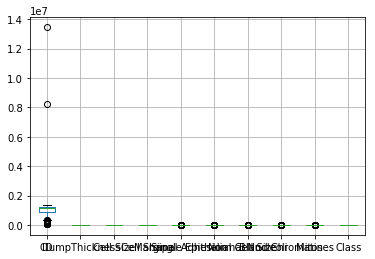

In [187]:
bc2.boxplot(grid='True')

### Check Missing Values

In [189]:
bc2.isnull().sum().sum()
bc2.dropna()

ID  ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
0    1000025               5          1           1                  1   
1    1002945               5          4           4                  5   
2    1015425               3          1           1                  1   
3    1016277               6          8           8                  1   
4    1017023               4          1           1                  3   
5    1017122               8         10          10                  8   
6    1018099               1          1           1                  1   
7    1018561               2          1           2                  1   
8    1033078               2          1           1                  1   
9    1033078               4          2           1                  1   
10   1035283               1          1           1                  1   
11   1036172               2          1           1                  1   
12   1041801               5          3           3                  3   
13   1043999               1          1           1                  1   
14   1044572               8          7           5                 10   
15   1047630               7          4           6                  4   
16   1048672               4          1           1                  1   
17   1049815               4          1           1                  1   
18   1050670              10          7           7                  6   
19   1050718               6          1           1                  1   
20   1054590               7          3           2                 10   
21   1054593              10          5           5                  3   
22   1056784               3          1           1                  1   
23   1057013               8          4           5                  1   
24   1059552               1          1           1                  1   
25   1065726               5          2           3                  4   
26   1066373               3          2           1                  1   
27   1066979               5          1           1                  1   
28   1067444               2          1           1                  1   
29   1070935               1          1           3                  1   
..       ...             ...        ...         ...                ...   
669  1350423               5         10          10                  8   
670  1352848               3         10           7                  8   
671  1353092               3          2           1                  2   
672  1354840               2          1           1                  1   
673  1354840               5          3           2                  1   
674  1355260               1          1           1                  1   
675  1365075               4          1           4                  1   
676  1365328               1          1           2                  1   
677  1368267               5          1           1                  1   
678  1368273               1          1           1                  1   
679  1368882               2          1           1                  1   
680  1369821              10         10          10                 10   
681  1371026               5         10          10                 10   
682  1371920               5          1           1                  1   
683   466906               1          1           1                  1   
684   466906               1          1           1                  1   
685   534555               1          1           1                  1   
686   536708               1          1           1                  1   
687   566346               3          1           1                  1   
688   603148               4          1           1                  1   
689   654546               1          1           1                  1   
690   654546               1          1           1                  3   
691   695091  

There are no NA and null values in the dataset.
But there are '?' in the dataset and we will treat them 

### Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

In [197]:
bc2['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [207]:
bc2['Bare Nuclei'] = bc2['Bare Nuclei'].map(lambda x: x if x!= '?' else 1)
bc2['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
1      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

### Print and plot the distribution of target variable (Class - using Histogram) 

In [203]:
plt.hist(bc2['Class'], color = 'blue', edgecolor = 'black')

(array([458.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 241.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <a list of 10 Patch objects>)

### convert the datatype of Bare Nuclei to `int`

In [208]:
bc2['Bare Nuclei'] = pd.to_numeric(bc2['Bare Nuclei'])
bc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


### Standardization of Data (Use Standard Scaler)

In [210]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(bc2)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.11623873,  0.20693572, -0.69999505, ..., -0.61182504,
        -0.34391178, -0.72539705],
       [-0.1115035 ,  0.20693572,  0.28384518, ..., -0.28411186,
        -0.34391178, -0.72539705],
       [-0.09126525, -0.50386559, -0.69999505, ..., -0.61182504,
        -0.34391178, -0.72539705],
       ...,
       [-0.29657482,  0.20693572,  2.25152563, ...,  2.33759359,
         0.23956962,  1.37855538],
       [-0.28254589, -0.14846494,  1.59563215, ...,  1.02674087,
        -0.34391178,  1.37855538],
       [-0.28254589, -0.14846494,  1.59563215, ...,  0.37131451,
        -0.34391178,  1.37855538]])

In [212]:
type(bc2)

pandas.core.frame.DataFrame

In [213]:
bc2 = pd.DataFrame(bc2, columns = ['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'])

### Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them. (Use pd.scatter matrix())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BDE8FC84A8>,
      dtype=object)

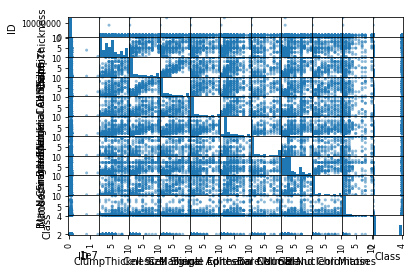

In [215]:
import pandas
from pandas.plotting import scatter_matrix
scatter_matrix(pd.DataFrame(bc2))

In [217]:
import seaborn as sns
sns.pairplot(bc2, diag_kind='kde')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [218]:
bc2.corr()

ID  ClumpThickness  Cell Size  Cell Shape  \
ID                           1.000000       -0.055308  -0.041603   -0.041576   
ClumpThickness              -0.055308        1.000000   0.644913    0.654589   
Cell Size                   -0.041603        0.644913   1.000000    0.906882   
Cell Shape                  -0.041576        0.654589   0.906882    1.000000   
Marginal Adhesion           -0.064878        0.486356   0.705582    0.683079   
Single Epithelial Cell Size -0.045528        0.521816   0.751799    0.719668   
Bare Nuclei                 -0.092533        0.590008   0.686673    0.707474   
Normal Nucleoli             -0.060051        0.558428   0.755721    0.735948   
Bland Chromatin             -0.052072        0.535835   0.722865    0.719446   
Mitoses                     -0.034901        0.350034   0.458693    0.438911   
Class                       -0.080226        0.716001   0.817904    0.818934   

                             Marginal Adhesion  Single Epithelial Cell Size  \
ID                                   -0.064878                    -0.045528   
ClumpThickness                        0.486356                     0.521816   
Cell Size                             0.705582                     0.751799   
Cell Shape                            0.683079                     0.719668   
Marginal Adhesion                     1.000000                     0.599599   
Single Epithelial Cell Size           0.599599                     1.000000   
Bare Nuclei                           0.666971                     0.583701   
Normal Nucleoli                       0.666715                     0.616102   
Bland Chromatin                       0.603352                     0.628881   
Mitoses                               0.417633                     0.479101   
Class                                 0.696800                     0.682785   

                             Bare Nuclei  Normal Nucleoli  Bland Chromatin  \
ID                             -0.092533        -0.060051        -0.052072   
ClumpThickness                  0.590008         0.558428         0.535835   
Cell Size                       0.686673         0.755721         0.722865   
Cell Shape                      0.707474         0.735948         0.719446   
Marginal Adhesion               0.666971         0.666715         0.603352   
Single Epithelial Cell Size     0.583701         0.616102         0.628881   
Bare Nuclei                     1.000000         0.674215         0.574778   
Normal Nucleoli                 0.674215         1.000000         0.665878   
Bland Chromatin                 0.574778         0.665878         1.000000   
Mitoses                         0.342397         0.344169         0.428336   
Class                           0.818968         0.756616         0.712244   

                              Mitoses     Class  
ID                          -0.034901 -0.080226  
ClumpThickness               0.350034  0.716001  
Cell Size                    0.458693  0.817904  
Cell Shape                   0.438911  0.818934  
Marginal Adhesion            0.417633  0.696800  
Single Epithelial Cell Size  0.479101  0.682785  
Bare Nuclei                  0.342397  0.818968  
Normal Nucleoli              0.344169  0.756616  
Bland Chromatin              0.428336  0.712244  
Mitoses                      1.000000  0.423170  
Class                        0.423170  1.000000

In [219]:
sns.heatmap(bc2.corr())

### Divide the dataset into feature set and target set

In [298]:
bc2.head()

ID  ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
0  1000025               5          1           1                  1   
1  1002945               5          4           4                  5   
2  1015425               3          1           1                  1   
3  1016277               6          8           8                  1   
4  1017023               4          1           1                  3   

   Single Epithelial Cell Size  Bare Nuclei  Normal Nucleoli  Bland Chromatin  \
0                            2            1                3                1   
1                            7           10                3                2   
2                            2            2                3                1   
3                            3            4                3                7   
4                            2            1                3                1   

   Mitoses  Class  
0        1      2  
1        1      2  
2        1      2  
3        1      2  
4        1      2

In [284]:
X= bc2
y=bc2['Class']
X=X.drop(columns='Class')

In [300]:
y=y.astype('str')

### Divide the Training and Test sets in 70:30 

In [301]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

print(x_train)

          ID  ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
259   242970               5          7           7                  1   
217  1223426               1          1           1                  1   
266  1198641              10         10           6                  3   
33   1074610               2          1           1                  2   
478  1296593               5          2           1                  1   
158  1193683               1          1           2                  1   
268   324427              10          8           8                  2   
561  1321942               5          1           1                  1   
223  1226612               7          5           6                  3   
528   807657               6          1           3                  2   
557  1321321               5          1           1                  3   
169  1199219               1          1           1                  2   
571   142932               7          

### Model 1 : Implement a default Decision Tree model with no attributes

In [302]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Check the feature importances of the Decision Tree model

In [303]:
decision.feature_importances_

array([0.00740625, 0.02604303, 0.73946297, 0.08262195, 0.01298069,
       0.02693904, 0.03401234, 0.01893615, 0.04768899, 0.0039086 ])

### Check the training & test accuracy of model 1 

In [304]:
decision.score(x_train,y_train)

1.0

In [296]:
y_test.dtype
y_test=y_test.astype('str')

In [305]:
decision.score(x_test,y_test)

0.9380952380952381

### Model 2: Implement a decision tree with depth of the tree = 10 and leaf nodes = 5

In [306]:
decision1=DecisionTreeClassifier(max_depth=10,max_leaf_nodes=5)
decision1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Check the training & test accuracy of model 2

In [307]:
decision1.score(x_train,y_train)

0.9529652351738241

In [308]:
decision1.score(x_test,y_test)

0.9428571428571428

### Print the confusion matrix of model 1 and model 2

In [253]:
from sklearn.metrics import confusion_matrix

## Model 1

In [309]:

y_pred=decision.predict(x_test)
y_pred=y_pred.astype('str')
y_test=y_test.astype('str')

In [310]:
print(confusion_matrix(y_test,y_pred))

[[130   5]
 [  8  67]]


## Model 2

In [311]:
y_pred=decision1.predict(x_test)
y_pred=y_pred.astype('str')
y_test=y_test.astype('str')

In [312]:
print(confusion_matrix(y_test,y_pred))

[[128   7]
 [  5  70]]
